# Logistic Regression: A Complete Guide

In this notebook, we will implement Logistic Regression and explain each step in detail.

---

## Introduction

Logistic Regression is a supervised learning algorithm used for binary classification tasks. It predicts the probability of a binary outcome based on one or more input features. 

The equation for Logistic Regression is:  
**P(Y=1 | X) = 1 / (1 + e^-(β0 + β1X))**  
Where:
- **P(Y=1 | X)** is the probability that the output is 1 given the input X.
- **β0** is the intercept.
- **β1** is the coefficient for the feature X.

Instead of predicting continuous values (like Linear Regression), Logistic Regression outputs probabilities which are then mapped to class labels (0 or 1) using a threshold, typically 0.5.

---

## 1. Importing Required Libraries

We'll begin by importing the necessary libraries for our implementation.

In [41]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

## 2. Creating a Synthetic Dataset

* For demonstration, we'll generate a simple binary classification dataset

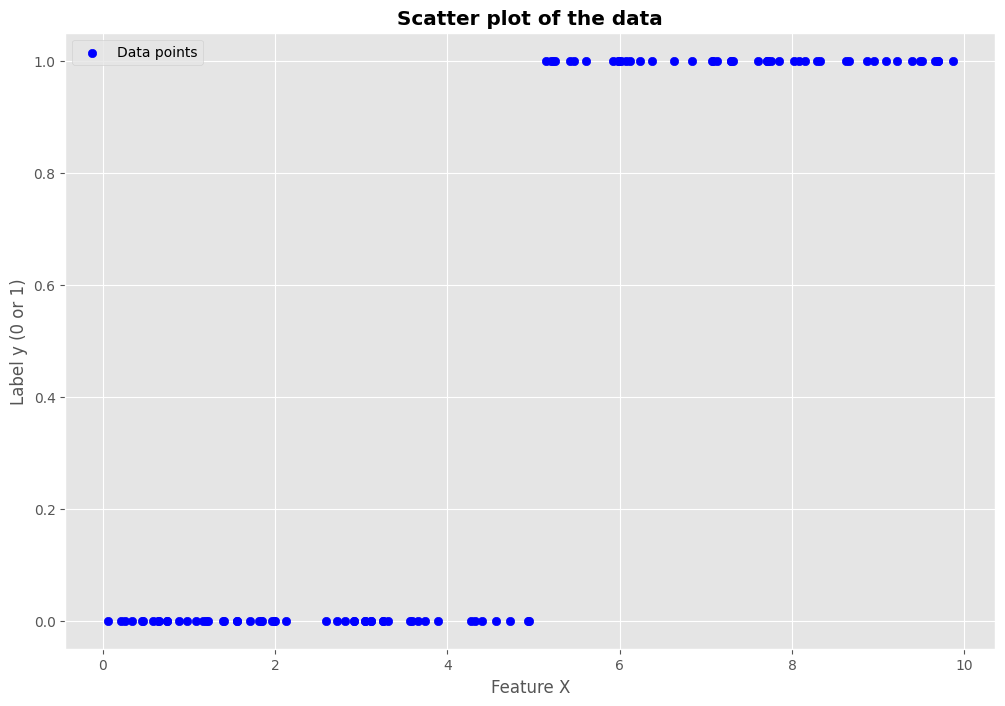

In [42]:
# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = (X > 5).astype(int)          # Class 1 if X > 5, otherwise class 0

# Visualize the data
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.scatter(X, y, color="blue", label="Data points")
plt.xlabel("Feature X")
plt.ylabel("Label y (0 or 1)")
plt.title("Scatter plot of the data", fontweight='bold')
plt.legend()
plt.show()

## 3. Splitting the Data into Training and Testing Sets

* We split our dataset into a training set and a test set to evaluate the model’s performance on unseen data.

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Training the Logistic Regression Model

* We now create an instance of the LogisticRegression model and train it on the training data.

In [44]:
# Create a logistic regression model
logistic_regressor = LogisticRegression()

# Train the model
logistic_regressor.fit(X_train, y_train)

# Print the learned coefficients
print(f"Intercept: {logistic_regressor.intercept_}")
print(f"Coefficient: {logistic_regressor.coef_}")

Intercept: [-11.10173283]
Coefficient: [[2.27093491]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 5. Making Predictions

* We use the trained model to make predictions on the test data.

In [45]:
# Predict on the test set
y_pred = logistic_regressor.predict(X_test)

# Predict the probability for each class
y_pred_prob = logistic_regressor.predict_proba(X_test)[:, 1]

## 6. Evaluating the Model 

### 6.1. Accuracy Score 

* The first evaluation metric we will check is the accuracy score.

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


### 6.2. Confusion Matrix and Classification Report 

* To get a more detailed performance breakdown, we’ll compute the confusion matrix and classification report.

<Figure size 1200x800 with 0 Axes>

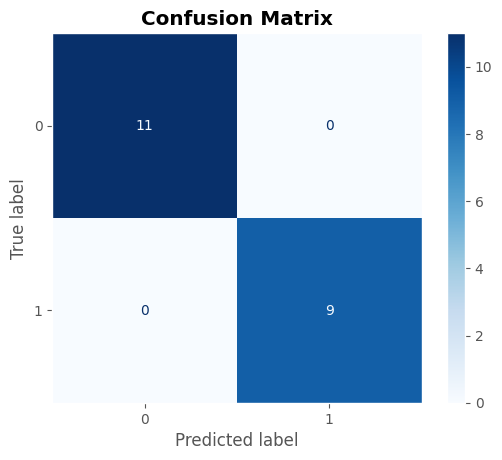

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [47]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_regressor.classes_)
disp.plot(cmap=plt.cm.Blues)

# Remove grid
plt.grid(False)

plt.title('Confusion Matrix', fontweight='bold')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

### 6.3. ROC Curve and AUC

* We’ll also visualize the ROC curve and calculate the Area Under the Curve (AUC) to evaluate the performance of the model.

* The ROC curve (Receiver Operating Characteristic curve) is a graphical representation used to evaluate the performance of a binary classification model. It shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.

* Characteristics:

	•	A model with no discrimination (random guessing) produces a diagonal ROC curve, with points close to the line y = x.
	•	A perfect model would have an ROC curve that passes through the point (0, 1), which means 0% FPR and 100% TPR.

AUC (Area Under the Curve):

	•	AUC represents the area under the ROC curve. It provides a single scalar value to evaluate the model:
	•	AUC = 1: Perfect model.
	•	AUC = 0.5: Random guessing.
	•	AUC between 0.5 and 1: Better than random guessing.


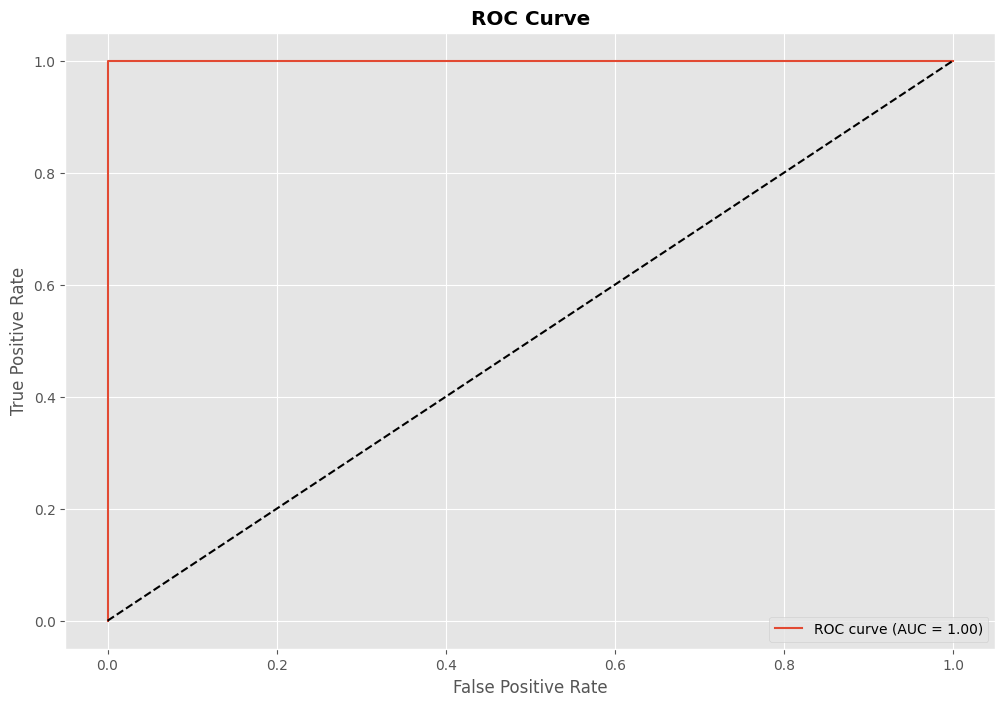

In [48]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontweight='bold')
plt.legend(loc="lower right")
plt.show()

## 7. Visualizing the Decision Boundary

* Now, let’s visualize how the Logistic Regression model separates the two classes.

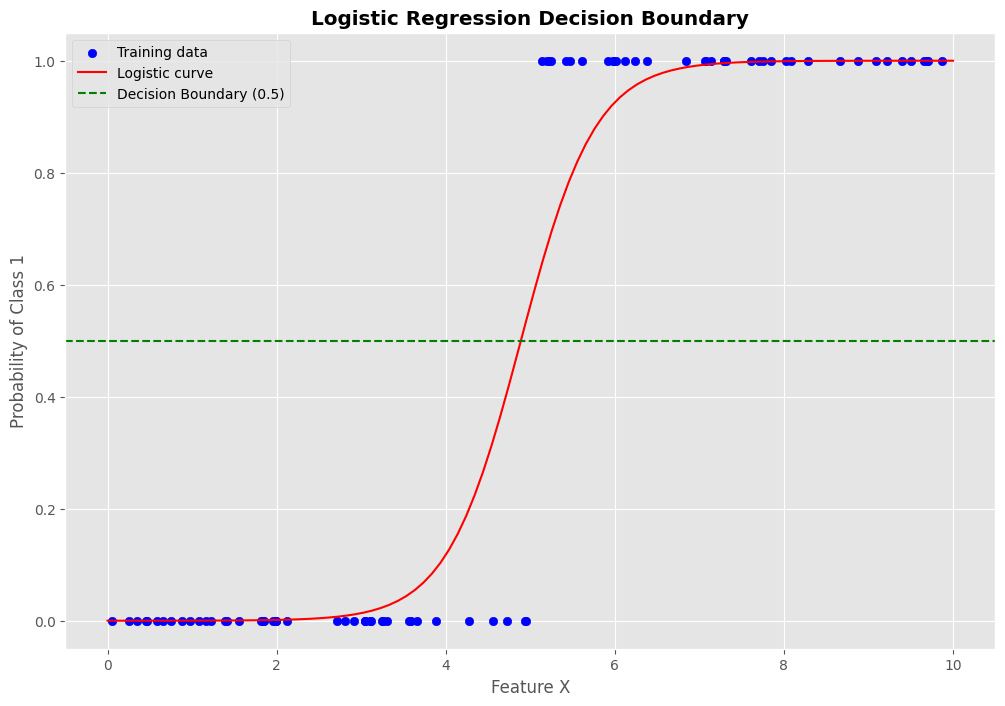

In [49]:
# Create a range of values for X to visualize the decision boundary
X_range = np.linspace(0, 10, 100).reshape(-1, 1)

# Predict probabilities across this range
y_range_prob = logistic_regressor.predict_proba(X_range)[:, 1]

# Plot data points and decision boundary
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_range, y_range_prob, color='red', label='Logistic curve')
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel('Feature X')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression Decision Boundary', fontweight='bold')
plt.legend()
plt.show()

## 8. Conclusion 

* In this notebook, we have implemented Logistic Regression from scratch using scikit-learn. We covered the following steps :

	•	Understanding the equation of logistic regression.
	•	Generating synthetic data.
	•	Splitting the data into training and testing sets.
	•	Training the model.
	•	Making predictions.
	•	Evaluating the model’s performance using accuracy, confusion matrix, classification report, and ROC-AUC curve.
	•	Visualizing the decision boundary.

**Logistic regression is widely used for binary classification problems and provides a probabilistic framework for predicting class labels.**